In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt

from mandelbrot_lib.algorithms._base import _BaseAlgorithm, _VectorBaseAlgorithm, _ComplexBaseAlgorithm
from mandelbrot_lib.algorithms.numpy_grid import NumpyGrid
from mandelbrot_lib.algorithms.naive_sequential import NaiveSequential
from mandelbrot_lib.algorithms.numba_cuda import NumbaCuda
from mandelbrot_lib.settings import DEFAULT_ITER, DEFAULT_ESCAPE_RADIUS, DEFAULT_HEIGHT, DEFAULT_WIDTH


## Algorithms :

In [7]:
algo_vectorized = NumpyGrid()
algo_naive = NaiveSequential()
algo_cuda_python = NumbaCuda()

## Benchmark :

In [21]:
algo_vectorized.benchmark_compute_grid_defaults(DEFAULT_WIDTH, DEFAULT_HEIGHT, DEFAULT_ITER)

2.35503888130188

In [15]:
algo_naive.benchmark_compute_grid_defaults(DEFAULT_WIDTH, DEFAULT_HEIGHT, DEFAULT_ITER)

13.924699306488037

In [6]:
algo_cuda_python.benchmark_compute_grid_defaults(DEFAULT_WIDTH, DEFAULT_HEIGHT, DEFAULT_ITER)

/home/onyxia/.cache/pypoetry/virtualenvs/mandelbrot-lib-TpWVSn1W-py3.12/lib/python3.12/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 49 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/home/onyxia/.cache/pypoetry/virtualenvs/mandelbrot-lib-TpWVSn1W-py3.12/lib/python3.12/site-packages/numba/cuda/cudadrv/devicearray.py:886: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


0.38804149627685547

## Print fractals : 

Fonction de print à ajouter directement dans les models ?

In [10]:
def print_fractal_vector(algo : _VectorBaseAlgorithm, x_min: float, y_min: float, x_max: float, y_max: float, width: int, height: int, max_iter: int):
    """Prints the Mandelbrot fractal using the given algorithm and parameters for vector algo."""  
    start = timer()
    res = algo.compute_grid(x_min, y_min, x_max, y_max, width, height, max_iter) 
    dt = timer() - start

    print("Mandelbrot created in %f s" % dt)
    cmap = plt.cm.jet
    cmap.set_under('black')
    plt.imshow(res, vmin=0, cmap=cmap)
    plt.show()

In [11]:
def print_fractal_complex(algo : _ComplexBaseAlgorithm, c1: complex, c2: complex, width: int, height: int, max_iter: int):
    """Prints the Mandelbrot fractal using the given algorithm and parameters for complex algo."""  
    start = timer()
    res = algo.compute_grid(c1, c2, width, height, max_iter)
    dt = timer() - start

    print("Mandelbrot created in %f s" % dt)
    cmap = plt.cm.jet
    cmap.set_under('black')
    plt.imshow(res, vmin=0, cmap=cmap)
    plt.show()

Mandelbrot created in 4.723548 s


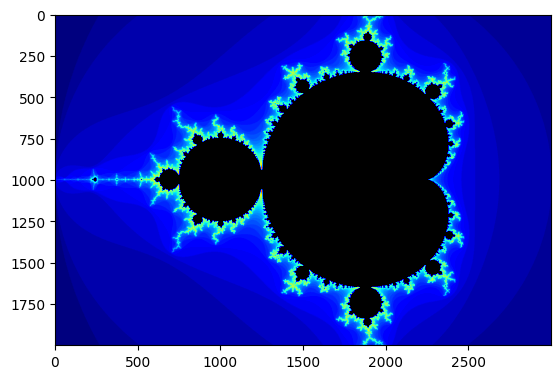

In [12]:
print_fractal_vector(algo_vectorized, -2.0, -1.0, 1.0, 1.0, 3000, 2000, 50)

Mandelbrot created in 58.535001 s


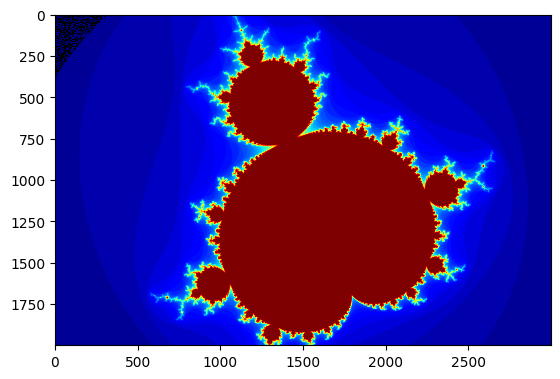

In [14]:
print_fractal_complex(algo_naive, -2.0 + 1j, 1.0 - 1j, 3000, 2000, 50)

/home/onyxia/.cache/pypoetry/virtualenvs/mandelbrot-lib-TpWVSn1W-py3.12/lib/python3.12/site-packages/numba/cuda/cudadrv/devicearray.py:886: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Mandelbrot created in 0.044028 s


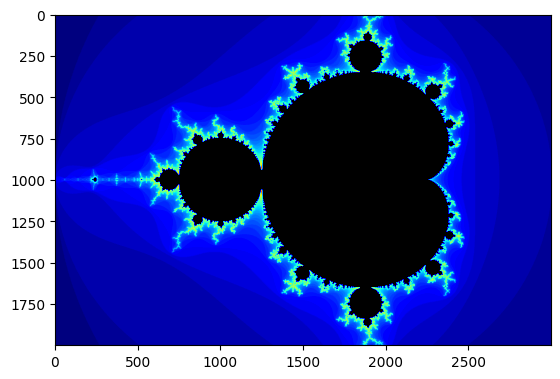

In [13]:
print_fractal_vector(algo_cuda_python, -2.0, -1.0, 1.0, 1.0, 3000, 2000, 50)